> ## **ACCEL DATA ANALYSIS 

In [37]:
import pickle
import pandas as pd

In [38]:
data = None
with open('data.pickle','rb') as file:
    data = pickle.load(file)

> # initial view of data

In [40]:
#df = pd.DataFrame(data = data[0])
#dfcopy = df.copy()
#df
df = pd.DataFrame({})
for episode in data:
    subdf = pd.DataFrame(episode)
    #print(subdf)
    df = pd.concat([df,subdf])

df

C:\Users\pc\Anaconda3\envs\gpubase\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,d(travel_dist),dt,dx,dy,dz,travel_dist,travel_time,v(t),x,y,z
0,-6.8729,2.371803,-0.093374,-0.079009,0.119710,-6.8729,2.371837,-2.897753,2.738967,-0.995988,-9.461885
1,-0.7300,0.101271,0.047884,0.028730,-0.028730,-7.6029,2.473090,-7.208371,2.786851,-0.967257,-9.490615
2,0.7300,0.100762,-0.158017,0.179565,0.059855,-6.8729,2.573853,7.244803,2.628833,-0.787692,-9.430760
3,0.8800,0.100860,0.131681,-0.165200,-0.100556,-5.9929,2.674714,8.724976,2.760515,-0.952892,-9.531317
4,-2.0400,0.100954,-0.150835,-0.028730,-0.069432,-8.0329,2.775668,-20.207212,2.609680,-0.981623,-9.600749
...,...,...,...,...,...,...,...,...,...,...,...
35,0.6100,0.100359,0.033519,-0.031125,0.684742,22.9655,5.750833,6.078196,2.363077,-0.905008,-9.119514
36,1.5000,0.109342,-0.442927,-1.735796,0.648829,24.4655,5.860174,13.718442,1.920150,-2.640804,-8.470685
37,0.8500,0.108834,0.191536,1.077391,-1.565808,25.3155,5.969007,7.810040,2.111686,-1.563414,-10.036493
38,0.4700,0.108271,0.186748,-0.368707,1.319205,25.7855,6.077279,4.340945,2.298434,-1.932121,-8.717288


>  # **Functions to draw out episode samples** 
>
> By creating lower triangular matrices of each episode and padding the upper part with zeros
>
> Using this, we are able to create more features and increase the sample size of the dataset
>
> by increasing the rows in the dataset

In [42]:

def create_diagonal_padding(series):
  mat_padded = pd.DataFrame({})
  for i in range(1,len(series)+1):
    seriescopy = series.copy()
    seriescopy[i:len(seriescopy)] = 0
    mat_padded = pd.concat([mat_padded,seriescopy],axis = 1)
    new_mat = mat_padded.T


  timekeys = []
  for i in range(len(series)):
    timekeys.append(series.name+str(i))
  new_mat.columns = timekeys
  new_mat.index = range(0,len(series))

  #print(new_mat.head())
  #print(new_mat.tail())
      
  return new_mat
    #print(seriescopy)
    #print(a)


In [43]:
def remake_df_with_padded(features_to_pad = None, from_original = None, features_to_maintain = None):
  '''rebuild new epsiode dataframe with drawn and padded features'''
  new_df = pd.DataFrame({})
  for feature in features_to_pad:
    padded_mat = create_diagonal_padding(from_original[feature])
    new_df = pd.concat([new_df,padded_mat],axis = 1)
  
  if features_to_maintain != None: 
    for keep in features_to_maintain:
      new_df = pd.concat([new_df,from_original[keep]],axis = 1)
  
  return new_df

In [44]:
#newDF = remake_df_with_padded(features_to_maintain=['travel_time','travel_dist','v(t)','d(travel_dist)'],features_to_pad= ['x','y','z','dx','dy','dz'],from_original = df)
#newDF = remake_df_with_padded(features_to_pad= ['x','y','z','dx','dy','dz'],from_original = df)

In [45]:
def get_final_df():
    '''Go through all episodes and rebuild new dataframe with increased features'''
    old_df = pd.DataFrame({})
    i = 1
    for episode in data:
        episode_df = pd.DataFrame(episode)
        newDF = remake_df_with_padded(features_to_maintain=['travel_time','travel_dist','v(t)','d(travel_dist)','dt'],
                                      features_to_pad= ['x','y','z','dx','dy','dz'],from_original = episode_df)
        newDF = pd.concat([old_df,newDF])
        old_df = newDF
        print('progress:',str(i)+'/'+str(len(data)),'--->',round(100*(i/len(data)),2),'%')
        i +=1
        
    return newDF

In [46]:
#make new dataset from all episodes
finaldf = get_final_df() 

progress: 1/100 ---> 1.0 %
progress: 2/100 ---> 2.0 %
progress: 3/100 ---> 3.0 %
progress: 4/100 ---> 4.0 %
progress: 5/100 ---> 5.0 %
progress: 6/100 ---> 6.0 %
progress: 7/100 ---> 7.0 %
progress: 8/100 ---> 8.0 %
progress: 9/100 ---> 9.0 %
progress: 10/100 ---> 10.0 %
progress: 11/100 ---> 11.0 %
progress: 12/100 ---> 12.0 %
progress: 13/100 ---> 13.0 %
progress: 14/100 ---> 14.0 %
progress: 15/100 ---> 15.0 %
progress: 16/100 ---> 16.0 %
progress: 17/100 ---> 17.0 %
progress: 18/100 ---> 18.0 %
progress: 19/100 ---> 19.0 %
progress: 20/100 ---> 20.0 %
progress: 21/100 ---> 21.0 %
progress: 22/100 ---> 22.0 %
progress: 23/100 ---> 23.0 %
progress: 24/100 ---> 24.0 %
progress: 25/100 ---> 25.0 %
progress: 26/100 ---> 26.0 %
progress: 27/100 ---> 27.0 %
progress: 28/100 ---> 28.0 %
progress: 29/100 ---> 29.0 %
progress: 30/100 ---> 30.0 %
progress: 31/100 ---> 31.0 %
progress: 32/100 ---> 32.0 %
progress: 33/100 ---> 33.0 %
progress: 34/100 ---> 34.0 %
progress: 35/100 ---> 35.0 %
pro

In [47]:
finaldf.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,dz35,dz36,dz37,dz38,dz39,travel_time,travel_dist,v(t),d(travel_dist),dt
0,2.738967,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.371837,-6.8729,-2.897753,-6.8729,2.371803
1,2.738967,2.786851,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.473090,-7.6029,-7.208371,-0.7300,0.101271
2,2.738967,2.786851,2.628833,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.573853,-6.8729,7.244803,0.7300,0.100762
3,2.738967,2.786851,2.628833,2.760515,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.674714,-5.9929,8.724976,0.8800,0.100860
4,2.738967,2.786851,2.628833,2.760515,2.60968,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.775668,-8.0329,-20.207212,-2.0400,0.100954


**The Advantage of increased features**
> In hopes of imporving the resolution of the dataset
>
> In the real world application, it allows to test for the robustness of different predictions
> **The Po to P40** time feature prediction
> The time feature prediction makes a prediction depending on which no of timed features have been filled with actual sampled > > data other than the padded 0s

In [48]:

#new df with increased features
finaldf.shape

(4000, 245)

In [13]:
finaldf.columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       ...
       'dz35', 'dz36', 'dz37', 'dz38', 'dz39', 'travel_time', 'travel_dist',
       'v(t)', 'd(travel_dist)', 'dt'],
      dtype='object', length=245)

In [49]:
# separate input and output features

X = finaldf.copy().drop(['v(t)','travel_dist','d(travel_dist)'],axis = 1)
Y = finaldf[['v(t)','travel_dist','d(travel_dist)']]

In [50]:
X.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,dz32,dz33,dz34,dz35,dz36,dz37,dz38,dz39,travel_time,dt
0,2.738967,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.371837,2.371803
1,2.738967,2.786851,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.473090,0.101271
2,2.738967,2.786851,2.628833,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.573853,0.100762
3,2.738967,2.786851,2.628833,2.760515,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.674714,0.100860
4,2.738967,2.786851,2.628833,2.760515,2.60968,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.775668,0.100954


In [51]:
Y

,v(t),travel_dist,d(travel_dist)
0,-2.897753,-6.8729,-6.8729
1,-7.208371,-7.6029,-0.7300
2,7.244803,-6.8729,0.7300
3,8.724976,-5.9929,0.8800
4,-20.207212,-8.0329,-2.0400
...,...,...,...
35,6.078196,22.9655,0.6100
36,13.718442,24.4655,1.5000
37,7.810040,25.3155,0.8500
38,4.340945,25.7855,0.4700


In [52]:
#scale/normalize features 

from sklearn.preprocessing import MinMaxScaler

In [222]:
sc = MinMaxScaler()
Xscaled = sc.fit_transform(X)
Yscaled = sc.fit_transform(Y)


In [223]:
Xscaled

array([[6.52040816e-01, 1.13488372e-01, 0.00000000e+00, ...,
        5.15854922e-01, 1.19400072e-01, 9.23340854e-01],
       [6.52040816e-01, 6.54883721e-01, 0.00000000e+00, ...,
        5.15854922e-01, 1.39658758e-01, 5.14161835e-04],
       [6.52040816e-01, 6.54883721e-01, 7.56719504e-01, ...,
        5.15854922e-01, 1.59819082e-01, 3.07179234e-04],
       ...,
       [5.53061224e-01, 5.75813953e-01, 6.82977257e-01, ...,
        5.15854922e-01, 8.39116153e-01, 3.58808602e-03],
       [5.53061224e-01, 5.75813953e-01, 6.82977257e-01, ...,
        5.15854922e-01, 8.60778959e-01, 3.35930048e-03],
       [5.53061224e-01, 5.75813953e-01, 6.82977257e-01, ...,
        3.95233161e-01, 8.82371643e-01, 3.21675768e-03]])

In [224]:
from sklearn.model_selection import train_test_split

In [225]:
#split data for training and testing
xtrain,xtest,ytrain,ytest = train_test_split(Xscaled,Yscaled,test_size = 0.3)

In [226]:
xtrain.shape,xtest.shape

((2800, 242), (1200, 242))

In [227]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [228]:
#define model
model = Sequential()
model.add(Dense(units = xtrain.shape[1],input_dim = xtrain.shape[1],activation = 'relu'))
model.add(Dense(units = 512,activation = 'relu'))
model.add(Dense(units = 256,activation = 'relu'))
model.add(Dense(units = 128,activation = 'relu'))
model.add(Dense(units = 64,activation = 'relu'))
model.add(Dense(units = 32,activation = 'relu'))
model.add(Dense(units = 16,activation = 'relu'))
model.add(Dense(units = 8,activation = 'relu'))
model.add(Dense(units = ytrain.shape[1],activation = 'linear'))
model.compile(optimizer = Adam(learning_rate = 0.001),metrics = ['mse'],loss ='mse' )

In [229]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 242)               58806     
_________________________________________________________________
dense_29 (Dense)             (None, 512)               124416    
_________________________________________________________________
dense_30 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_31 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_32 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_33 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_34 (Dense)             (None, 16)               

In [230]:
hist = model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs = 50,
                callbacks = [ModelCheckpoint(filepath = 'accelmodel.hdf5',
                                            monitor = 'val_loss',mode = 'min',save_best_only = True)])

Train on 2800 samples, validate on 1200 samples
Epoch 1/50
2800/2800 [==============================] - 3s 968us/step - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 2/50
2800/2800 [==============================] - 1s 438us/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 3/50
2800/2800 [==============================] - 1s 442us/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 4/50
2800/2800 [==============================] - 1s 376us/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 5/50
2800/2800 [==============================] - 1s 358us/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 6/50
2800/2800 [==============================] - 2s 577us/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 7/50
2800/2800 [==============================] - 1s 481us/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0045 - val_mse: 0.0045


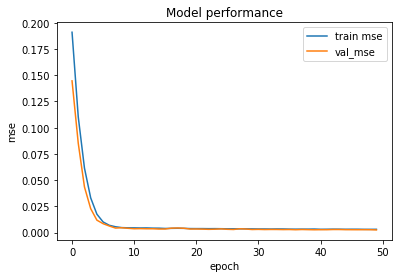

In [131]:
import matplotlib.pyplot as plt
plt.title('Model performance')
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.legend(['train mse','val_mse'])
plt.xlabel('epoch')
plt.ylabel('mse')
plt.show()

In [242]:
import numpy as np
a = sc.inverse_transform(model.predict(np.reshape(xtrain[1],(1,-1))))
a[0][1]

42.163322

# Travel predictions
> **Training fit**

In [247]:
actual = []
predicted = []
for i in range(len(xtrain)):
    actual_distance = sc.inverse_transform(np.reshape(ytrain[i],(1,-1)))[0][1]
    predicted_distance = sc.inverse_transform(model.predict(np.reshape(xtrain[i],(1,-1))))[0][1]
    actual.append(actual_distance)
    predicted.append(predicted_distance)
    print(actual_distance,predicted_distance)

    


17.947700000000022 18.692125
52.814 42.163322
-7.430700000000001 -16.991663
16.38549999999994 11.092721
29.974000000000007 36.163498
-28.504800000000007 -38.30574
-6.301599999999969 -1.7198759
0.11939999999998746 -0.21837206
-2.694099999999971 0.49088648
-28.03870000000002 -34.241478
0.12129999999999148 -2.9075553
69.22659999999996 68.79902
-47.03799999999998 -49.0637
-28.54799999999998 -44.40488
-42.56160000000002 -47.13591
-0.3489999999999928 -0.19978654
0.16459999999998792 -2.1275191
-0.4745000000000454 -1.6735858
21.471600000000038 27.224026
-0.1004999999999928 -3.6872327
27.91949999999997 22.12701
-0.04929999999997283 -0.56708777
-2.018199999999973 2.779428
-0.6781000000000093 3.1132386
-14.974199999999977 -28.085869
0.559199999999991 -1.1958245
-1.58229999999998 0.716586
-10.739000000000013 -1.434925
31.400200000000016 28.54361
-0.9587000000000081 -1.6122049
-2.1905000000000228 2.2281811
1.6618000000000124 1.0126466
-1.4312000000000253 -3.5745044
-9.369300000000004 -2.3288467
-1.

-11.170199999999975 -31.173906
-0.2279999999999872 -0.2046933
-1.2452000000000023 -0.7019427
21.06339999999998 0.035078406
-62.52410000000001 -51.258957
-10.8019 0.016747482
35.29290000000004 27.765863
-1.5095999999999872 1.0695372
-13.66189999999999 0.7109848
-0.6981000000000096 0.10079893
-0.5886999999999685 -3.8378725
0.7287999999999737 0.9445421
22.50620000000001 27.733091
-18.87339999999999 -20.89063
62.014100000000006 56.21683
29.493900000000036 20.009186
-9.165099999999983 -11.828939
12.881800000000037 17.116547
18.038500000000013 2.0758286
31.500199999999996 28.125967
0.8533999999999824 -1.0354753
-27.496600000000022 -34.548496
27.521799999999978 35.316444
-23.388600000000025 -19.380915
29.51729999999999 34.19533
28.095599999999987 22.183704
27.337700000000023 29.43135
13.90070000000001 -1.6813625
19.943999999999992 13.213854
-5.016099999999958 -1.6897179
-0.7091000000000023 -2.496429
-1.7985000000000195 0.4229556
-39.603399999999986 -50.31102
-31.5787 -38.208977
25.17410000000

-61.86160000000002 -68.85334
-30.779099999999996 -68.651886
-1.5666999999999596 1.0390667
36.31709999999999 0.94105875
-41.679599999999986 -42.376007
0.10690000000000069 -1.4992568
-1.0474999999999908 1.14543
-33.398600000000016 -43.777405
49.54659999999999 41.381886
-2.316000000000011 -2.9901602
0.07070000000002952 -0.22700518
-20.581600000000034 -24.586838
-11.791900000000007 -0.7798954
0.29260000000003783 -0.016025985
-0.5809000000000553 -0.9514122
-7.840500000000015 1.6084478
0.1109000000000137 0.15179916
-12.331899999999997 1.9220177
18.277199999999986 2.1920168
47.38759999999997 54.161613
33.20030000000001 26.814404
3.7201000000000537 4.3194685
29.29030000000001 27.52924
-0.1628000000000079 -2.1311643
3.8959000000000175 3.019489
1.117900000000056 -5.0121975
-0.131600000000053 -2.7297547
-2.090500000000021 5.1052914
-2.168500000000016 -1.1267595
12.258399999999941 -1.4812846
0.16459999999998792 -4.8822722
-61.86179999999994 -56.2694
-5.098899999999965 -1.8467921
-4.386700000000058

-6.759100000000002 2.1957202
-15.53860000000001 -18.353527
37.82719999999999 4.0644674
-1.2442000000000206 0.2325177
12.570300000000026 12.900018
-6.830500000000027 1.6121048
37.92549999999997 23.459532
-21.190899999999985 -77.5257
0.11690000000001166 -0.6102302
-13.79649999999999 -2.7944684
-3.208900000000003 -3.6647935
38.25469999999999 41.246685
-5.992900000000027 -3.8617582
-25.632 -18.675371
-23.602800000000002 -30.358341
5.096200000000027 7.20027
4.250200000000013 6.07131
0.14459999999998752 -0.5538025
-0.9820999999999634 -1.0158828
1.29010000000006 2.1956275
-18.630700000000015 0.2623633
-1.8659999999999912 -0.8439842
-1.5266999999999804 -7.5274105
0.7287999999999737 -1.8859421
0.26459999999998984 -0.24766219
35.30549999999999 25.86903
-4.82530000000001 -0.30146298
12.328799999999985 1.7372735
-1.2890000000000328 -0.44537923
22.09290000000004 25.356436
-25.08159999999997 -37.529793
-58.538600000000024 -62.953617
0.7287999999999737 -2.153592
-42.7541 -43.00758
12.381299999999994 

49.54659999999999 41.532063
-6.462900000000026 -3.035478
-1.1131999999999824 1.3793923
-11.566399999999975 -7.22745
-2.8889999999999776 -2.8271956
-63.68890000000002 -71.03683
0.48660000000002224 -3.4034505
-0.8989999999999496 -0.12983046
0.11690000000001166 -1.2134495
39.09260000000002 31.367346
-0.32160000000002437 -4.0986485
-1.8944000000000276 -0.7619348
31.810200000000012 28.315456
-5.860899999999986 -3.654297
16.535599999999977 16.55706
-52.882099999999944 -56.374256
-0.026100000000000834 -1.6710745
-4.638699999999994 -10.895497
2.2810000000000263 14.767943
-13.348700000000003 -7.6429043
12.454000000000008 7.1517234
-34.43959999999997 -37.784016
0.559199999999991 2.3985753
-8.670999999999989 -3.075716
48.391900000000014 41.257862
38.29099999999996 37.20548
-18.048700000000007 -9.545096
-1.125099999999976 -2.5747287
14.301800000000021 19.27183
-11.850500000000018 -2.4218206
6.66879999999996 1.4605505
-38.45870000000001 -41.149498
-25.32799999999998 -25.257376
-16.39870000000001 -4

-1.4266999999999783 -1.0284275
-4.482700000000004 -3.0245192
32.11850000000001 1.3589667
-21.036600000000025 -23.359339
28.493399999999983 2.7647655
78.04759999999995 72.641685
-7.602900000000027 -2.8852665
-0.46899999999999514 -0.21100035
-24.528600000000026 -21.632998
-0.5892000000000025 -9.310833
3.222900000000027 -2.6440368
-58.7987 -50.360996
-10.010999999999973 -2.6641614
-0.6460999999999698 4.506898
-9.509299999999985 -9.383856
-13.578600000000016 -15.663314
-41.631600000000056 -43.178997
0.13980000000001933 -0.028628493
-6.658600000000031 -2.7805467
17.873500000000014 14.395157
-39.42160000000001 -44.74496
55.62759999999996 55.46466
-0.9686999999999759 -2.67357
71.03350000000002 68.470955
-0.44899999999999474 -1.2701898
-8.064200000000024 -12.473289
-0.14889999999998643 -3.36091
23.52180000000003 27.760714
-0.44899999999999474 -2.620799
-15.126499999999993 -0.005633834
-15.102 -9.06553
-0.44899999999999474 -0.4115411
-0.1360999999999922 -1.3668668
20.75719999999999 3.0265253
-1

-1.3089999999999684 -3.7619913
19.638100000000012 18.862774
33.74659999999996 26.188131
-8.43420000000002 -0.19042435
-24.54159999999998 -31.359789
5.783399999999982 -4.931004
-3.172799999999991 -8.273585
-0.5990999999999894 -4.1937404
-8.670999999999989 -8.594701
-2.0485000000000135 -0.25109923
7.073299999999951 -1.5690161
-0.7595999999999834 0.34493348
10.360300000000016 10.630664
19.383900000000043 1.5958453
-0.765199999999993 0.31340984
-5.7891000000000155 0.70068526
37.90260000000003 27.60018
-49.16890000000001 -57.026867
-9.79929999999998 -5.3254895
-0.37120000000002623 0.9968616
-0.6781000000000093 -1.3840058
-7.368099999999978 0.23855858
-1.1615999999999762 -1.0706674
-12.009000000000006 -0.7086201
19.585000000000033 9.833824
47.63659999999999 45.51208
4.626599999999974 11.933386
58.89540000000002 53.51121
-10.331 -9.253329
33.60390000000004 24.043123
-0.026100000000000834 -1.6440063
-2.4220999999999484 -16.738283
20.75620000000001 19.81456
82.04759999999993 72.62311
-2.8714999

-2.666699999999981 -4.665692
-35.90639999999998 -56.997704
31.266599999999976 34.89663
27.16659999999996 27.5544
-18.780899999999992 -28.910662
62.973500000000016 71.726395
-21.73199999999999 -18.370771
0.028000000000004858 0.6271764
58.58759999999997 62.469547
-3.4189999999999774 -3.939387
71.03350000000002 74.494156
19.321499999999983 18.245275
-3.5581999999999816 1.4273837
-0.8086000000000134 -0.9524074
11.617599999999952 33.861866
-14.242400000000035 7.632054
-11.060700000000018 -22.827303
-41.02799999999998 -41.284462
33.97099999999997 37.091698
67.70190000000001 62.445107
8.691200000000016 11.061823
-14.485099999999978 -13.315735
-1.1131999999999824 2.8046908
-73.10639999999998 -67.33016
-54.81869999999999 -49.820564
-4.8741999999999726 -7.4791183
12.432600000000038 3.5557845
-10.339000000000004 -8.761241
-58.0686 -61.572334
-1.1195999999999688 -1.1516984
-1.4531999999999892 0.53997725
-1.6986999999999794 -2.5835586
-61.47120000000003 -58.419582
-21.472800000000003 -2.9673045
9.7

-50.9838 -55.31452
0.5069000000000085 -0.27584136
-6.284599999999978 -2.3922527
43.95130000000002 42.488186
60.89549999999998 53.984783
-58.897600000000004 -68.22211
35.52410000000002 29.910513
-22.002800000000004 -3.5833342
-0.04610000000000122 -2.521252
-0.1360999999999922 -7.269551
-1.5951999999999984 -1.4605119
31.500199999999996 29.277102
-1.553199999999991 1.1668624
28.777199999999997 -2.5390275
-30.861999999999995 -27.9898
24.68179999999999 23.879047
-4.764200000000025 -0.14749017
-86.37089999999999 -78.01142
64.03659999999996 57.753605
-5.057600000000018 -7.979862
-1.9366999999999777 0.8770047
48.855400000000024 48.186626
-12.75910000000001 -3.550584
-29.378600000000024 -37.624596
-1.4331999999999887 1.8543414
-3.26229999999997 3.4604151
-1.0274999999999905 0.46403816
-0.3389999999999818 1.0908076
-1.8366999999999756 0.69653076
21.371600000000015 19.249645
-0.02760000000001649 -2.1687405
-3.9940999999999747 0.021943556
-47.149100000000004 -42.491356
-9.48259999999997 -4.1565924

-1.4266999999999783 -3.778378
31.577599999999954 47.51373
41.728100000000005 44.70028
-8.921399999999972 -1.8767534
46.504099999999994 39.244286
-8.192599999999954 -1.7327214
-53.27799999999998 -55.20637
-0.04899999999998694 -0.7608933
0.34010000000005225 0.19483747
70.29659999999996 65.87063
-52.11889999999997 -72.21273
-0.9886999999999979 -0.8771049
19.85179999999999 18.440527
-18.836399999999976 -20.497337
22.134100000000007 17.695683
-0.1360999999999922 -5.36288
-1.0031999999999697 2.8889043
-0.7437999999999794 0.26032653
8.065599999999995 14.27744
-9.81929999999998 -1.3569491
-1.1986000000000103 -1.359067
-45.38959999999997 -47.35772
-17.9928 -25.437391
-12.961599999999992 -15.966561
-42.461799999999926 -43.679356
-5.8720000000000026 -5.065431
52.86929999999999 14.135063
9.126200000000008 13.179518
0.11579999999998437 -1.1017281
3.150999999999968 -0.6304591
-1.4090000000000351 1.1417615
71.03350000000002 67.02493
39.020999999999965 33.94481
-7.023400000000027 -2.1722817
36.8618000

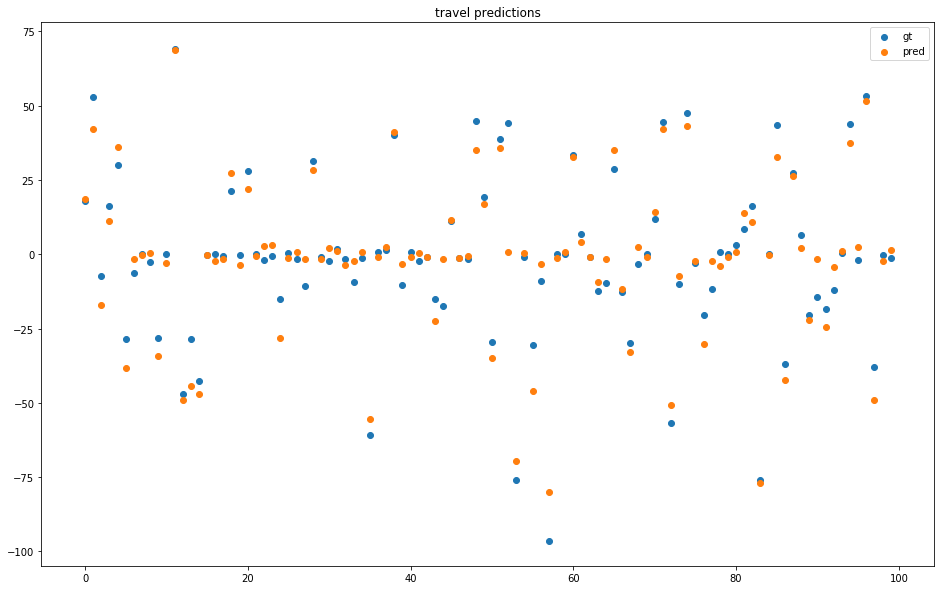

In [250]:
plt.figure(figsize=(16,10))
plt.title('travel predictions')
plt.scatter(list(range(len(actual[0:100]))),actual[0:100])
plt.scatter(list(range(len(predicted[0:100]))),predicted[0:100])

plt.legend(['gt','pred'])
plt.show()

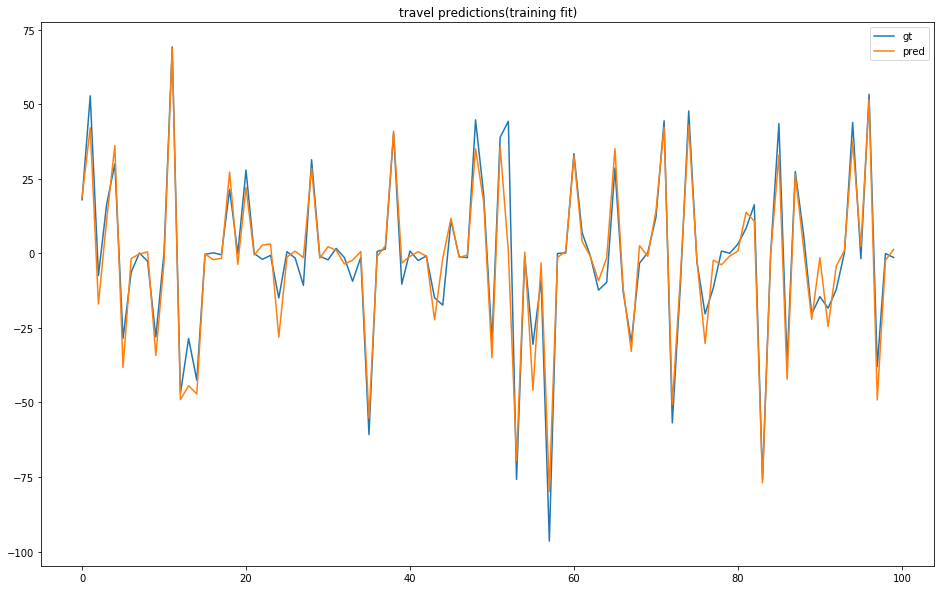

In [252]:
plt.figure(figsize=(16,10))
plt.title('travel predictions(training fit)')
plt.plot(list(range(len(actual[0:100]))),actual[0:100])
plt.plot(list(range(len(predicted[0:100]))),predicted[0:100])

plt.legend(['gt','pred'])
plt.show()

> **Test fit / Unseen data**

In [254]:
actual = []
predicted = []
for i in range(len(xtest)):
    actual_distance = sc.inverse_transform(np.reshape(ytest[i],(1,-1)))[0][1]
    predicted_distance = sc.inverse_transform(model.predict(np.reshape(xtest[i],(1,-1))))[0][1]
    actual.append(actual_distance)
    predicted.append(predicted_distance)
    print(actual_distance,predicted_distance)

    


-1.078699999999989 -2.7385497
-24.32380000000001 -52.336205
-29.39160000000002 -32.28546
59.6155 52.0973
0.16690000000000185 -0.4504596
45.977099999999986 15.627784
7.741900000000005 4.969684
18.363900000000047 11.712246
13.94500000000003 4.3885107
-0.9189999999999716 -4.2404237
0.7287999999999737 -0.9080267
-11.918700000000007 -17.747189
-1.2240999999999962 -4.95879
1.8387999999999631 0.17405318
-1.6451999999999887 -1.4183993
-21.472800000000003 -2.393433
2.7854999999999537 0.99621356
4.38879999999998 -0.8842451
-51.7538 -55.89607
11.93549999999995 15.69708
-20.849599999999977 -33.181698
5.4232999999999505 -3.5115845
-1.553199999999991 1.5634654
0.10690000000000069 -1.5537288
21.151499999999988 17.306128
0.17139999999998418 -3.9612823
6.9701000000000635 2.6990683
-0.6216000000000302 -3.454856
-0.4609000000000529 0.19026631
-4.066099999999972 -2.7919571
32.516200000000026 39.052853
10.90329999999995 2.1961715
-0.6387999999999827 0.7973508
-0.40279999999999105 1.4668113
-23.794800000000

-0.4847999999999991 -0.011315957
-48.03959999999998 -46.319996
-6.465099999999994 -7.1303215
-0.44590000000000407 -3.1911058
-0.34879999999998784 3.7490344
36.224100000000014 38.68083
-0.04610000000000122 -2.2251914
19.488600000000012 12.155277
33.87719999999999 1.2226652
22.882299999999987 16.36896
45.93860000000002 43.721867
2.543999999999998 3.0646684
27.82410000000002 28.207832
-18.868700000000004 -50.09447
0.26459999999998984 -2.5455081
-0.05899999999999792 0.16670461
52.17350000000002 60.522987
-0.4389999999999838 1.0357223
-1.812099999999969 -0.598623
-1.1551999999999898 -5.0029044
2.06660000000001 -1.7980022
-0.1360999999999922 -3.5610802
8.651300000000019 16.45226
31.03020000000002 28.776796
-16.03120000000003 -9.146711
-36.43160000000005 -35.60407
0.04120000000000899 1.6205064
-11.579299999999993 -10.943778
-0.9383999999999787 0.846754
-7.4625999999999735 -1.7546746
0.46660000000002183 0.34967822
38.29559999999999 29.31153
-0.018999999999954026 -10.821399
-0.44899999999999474

0.29160000000003455 3.9793513
-1.2452000000000023 -1.752175
-2.623800000000016 1.6927422
-75.04909999999998 -70.81373
28.033399999999975 1.674585
-2.666699999999981 -4.2569146
3.8568999999999987 4.2287283
4.2854999999999395 1.5776069
-22.19760000000001 -12.916459
-0.14910000000001294 -1.447678
-31.128600000000024 -38.947918
-0.15509999999998933 -3.0629745
-1.8109000000000468 -1.6082008
31.14810000000001 27.63638
-4.786700000000044 -0.20957692
-48.562799999999996 -47.529034
38.62469999999999 37.964153
-17.151799999999938 -18.334248
-63.824799999999996 -61.28079
-2.1586999999999668 -1.9823877
-2.392299999999985 3.8594596
-1.1677000000000197 0.5232086
-33.96419999999997 -50.170673
-0.46899999999999514 2.0573008
48.467200000000005 -1.2674123
48.995499999999986 40.64065
-62.50199999999999 -48.060444
-70.48909999999998 -63.77527
-2.396700000000051 -2.1350412
38.48030000000003 37.849815
-111.64760000000003 -83.65449
45.92179999999997 42.432617
-1.1131999999999824 3.9179127
5.60770000000002 5.

4.411800000000012 2.2292805
-13.680500000000022 -4.6545014
7.425499999999958 14.017
-19.350500000000025 -26.392347
1.6186000000000185 3.0306914
-0.44899999999999474 2.5392976
0.10690000000000069 0.66486824
-22.589299999999984 -9.950205
-0.8509000000000497 -3.3698902
32.59709999999998 24.871628
54.75549999999999 48.416157
-0.091599999999966 -2.1861687
49.64659999999997 39.69771
7.803299999999954 2.5910847
-34.31339999999999 -40.254356
-8.032900000000003 -2.8886805
0.36660000000001985 -1.6603005
4.407200000000006 -1.0988002
-1.2733999999999905 4.449139
30.011799999999994 27.216805
-18.319100000000013 -10.742149
26.892900000000026 27.228828
60.07190000000002 51.854244
-0.2186999999999936 -2.7142012
-1.5666999999999596 -1.5896385
-1.406699999999978 -1.7202
0.8539999999999973 -4.144846
-0.6387999999999827 -0.3603441
-69.5548 -62.586094
-93.60089999999998 -78.67135
63.09410000000001 57.17101
-1.309000000000033 -0.9074828
-6.772899999999999 -1.6942312
-38.17209999999994 -46.72336
-6.908099999

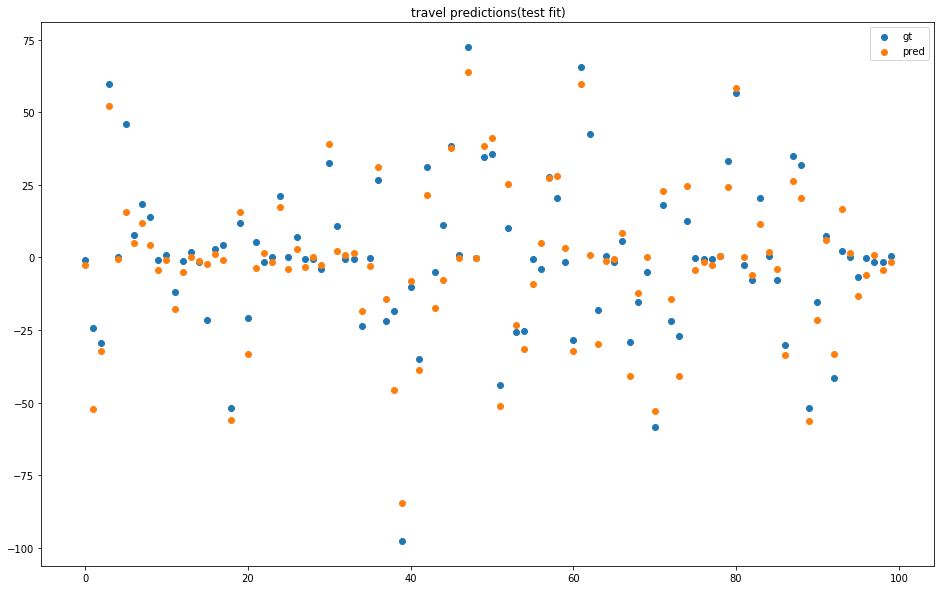

In [258]:
plt.figure(figsize=(16,10))
plt.title('travel predictions(test fit)')
plt.scatter(list(range(len(actual[0:100]))),actual[0:100])
plt.scatter(list(range(len(predicted[0:100]))),predicted[0:100])

plt.legend(['gt','pred'])
plt.show()

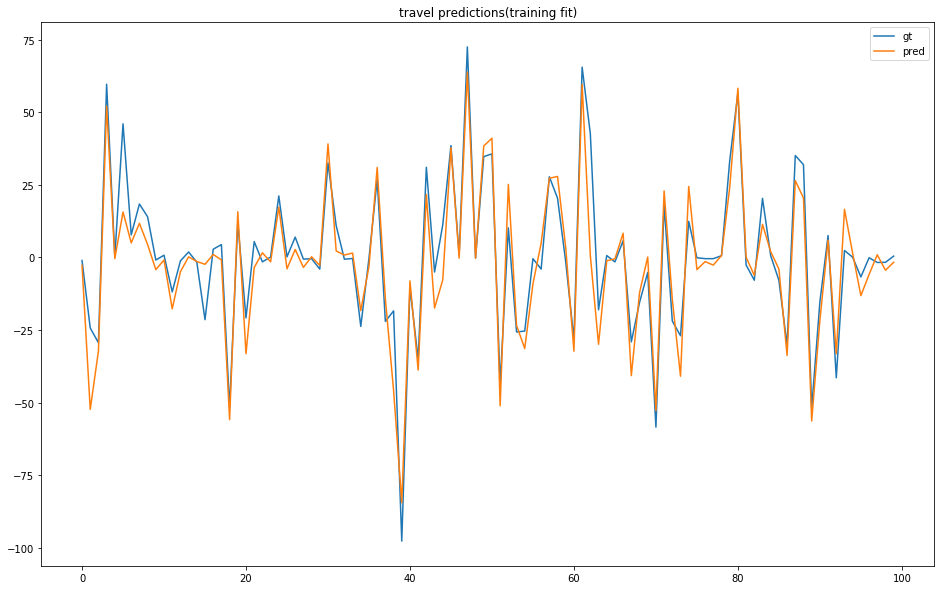

In [259]:
plt.figure(figsize=(16,10))
plt.title('travel predictions(training fit)')
plt.plot(list(range(len(actual[0:100]))),actual[0:100])
plt.plot(list(range(len(predicted[0:100]))),predicted[0:100])

plt.legend(['gt','pred'])
plt.show()

In [68]:
train_predictions = sc.inverse_transform(model.predict(xtrain))
train_predictions

array([[14.387681  ,  0.31160453,  1.0582458 ],
       [12.888506  , 34.44871   ,  0.77402675],
       [31.092688  , 21.827848  ,  3.06122   ],
       ...,
       [-4.05614   , 35.558914  , -0.76234454],
       [15.939789  ,  0.29241723,  1.0441724 ],
       [ 4.940643  , -3.0483236 , -0.06046762]], dtype=float32)

In [69]:
train_actual = sc.inverse_transform(ytrain)
train_actual

array([[ 25.00018842,   4.0519    ,   2.68      ],
       [ 41.34799262,  36.3726    ,   4.32      ],
       [ 20.62894877,  33.4656    ,   2.21      ],
       ...,
       [  0.        ,  31.9612    ,   0.        ],
       [ -7.09760159,  -4.0415    ,  -0.75      ],
       [-20.06640752,  -7.3196    ,  -2.22      ]])

In [74]:
v_pred = []
travel_pred = []
t_change_pred = []
v_a = []
travel_a = []
t_change_a= []

for i in train_predictions:
    v_pred.append(i[0])
    travel_pred.append(i[1])
    t_change_pred.append(i[2])

for i in train_actual:
    v_a.append(i[0])
    travel_a.append(i[1])
    t_change_a.append(i[2])

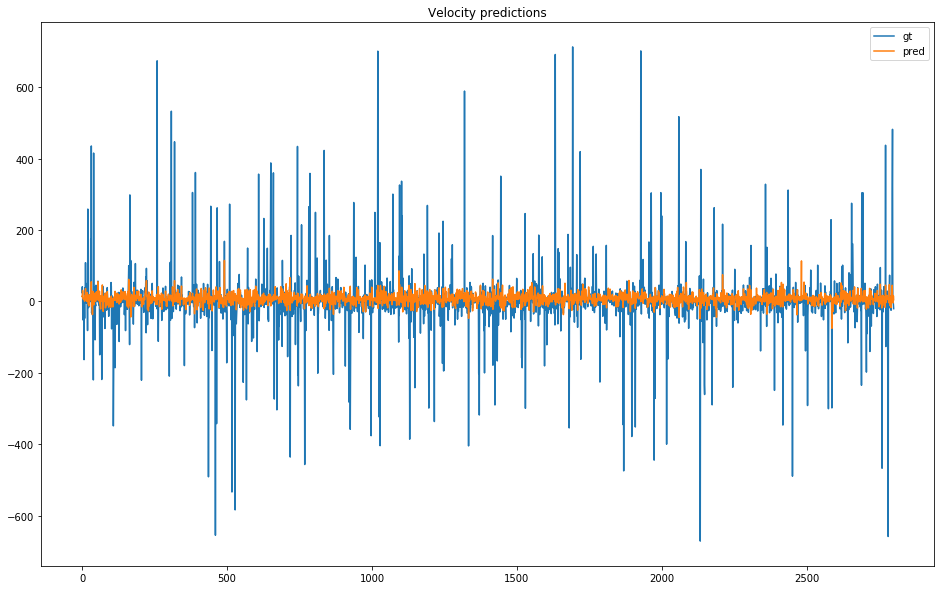

In [83]:

plt.figure(figsize=(16,10))
plt.title('Velocity predictions')
plt.plot(list(range(len(v_a))),v_a)
plt.plot(list(range(len(v_pred))),v_pred)
plt.legend(['gt','pred'])
plt.show()

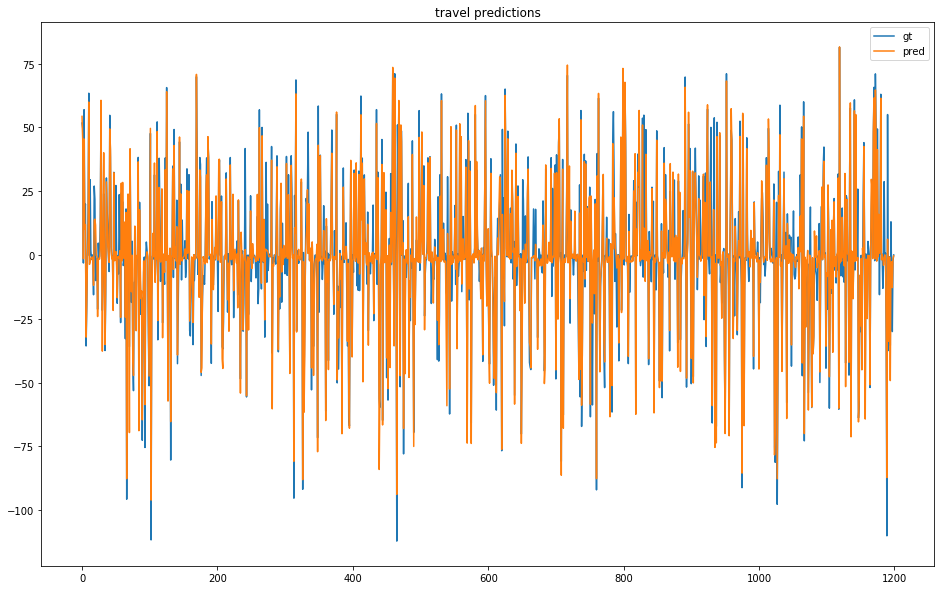

In [118]:
plt.figure(figsize=(16,10))
plt.title('travel predictions')
plt.plot(list(range(len(travel_a))),travel_a)
plt.plot(list(range(len(travel_pred))),travel_pred)

plt.legend(['gt','pred'])
plt.show()

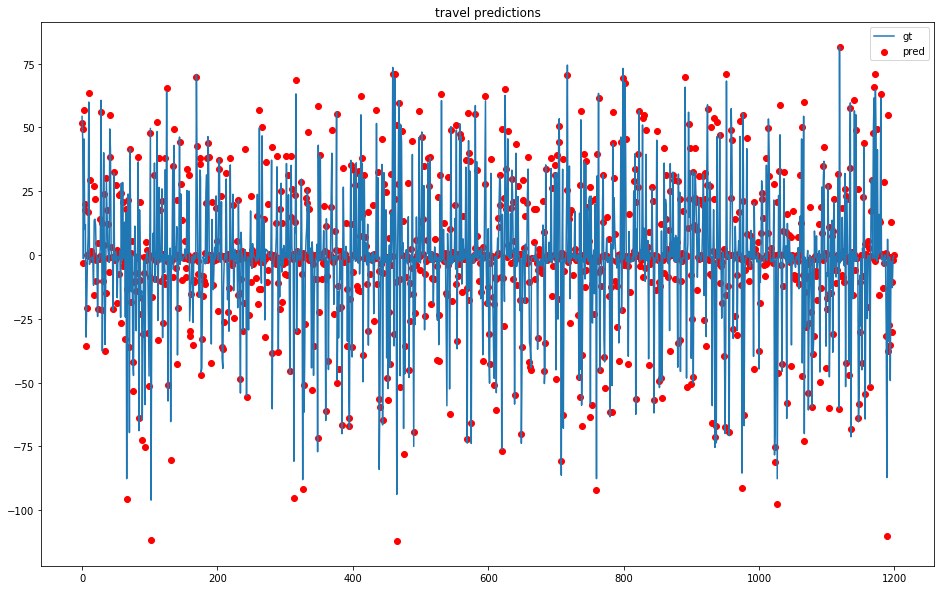

In [119]:
plt.figure(figsize=(16,10))
plt.title('travel predictions')
plt.scatter(list(range(len(travel_a))),travel_a,color = 'r')
plt.plot(list(range(len(travel_pred))),travel_pred)

plt.legend(['gt','pred'])
plt.show()

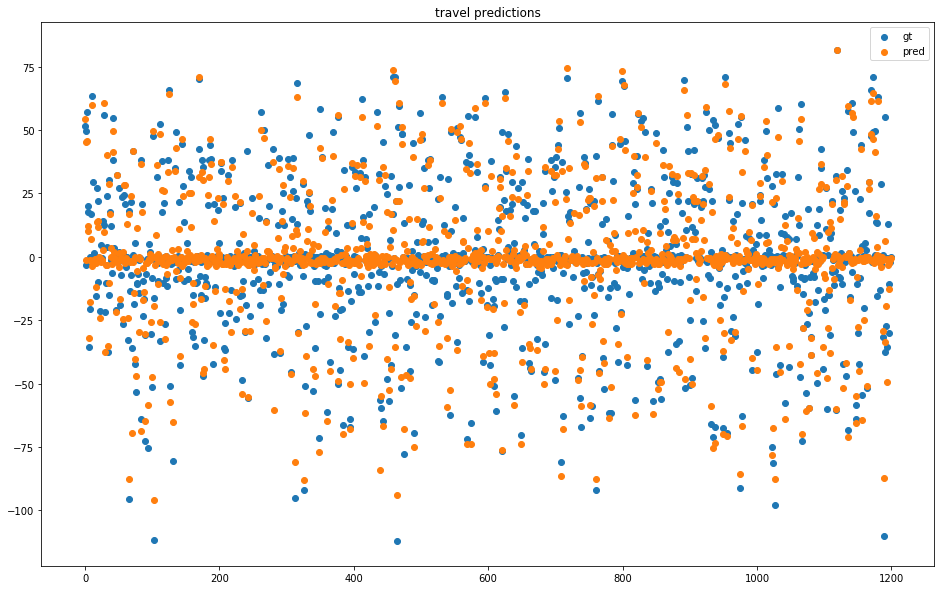

In [120]:
plt.figure(figsize=(16,10))
plt.title('travel predictions')
plt.scatter(list(range(len(travel_a))),travel_a)
plt.scatter(list(range(len(travel_pred))),travel_pred)

plt.legend(['gt','pred'])
plt.show()

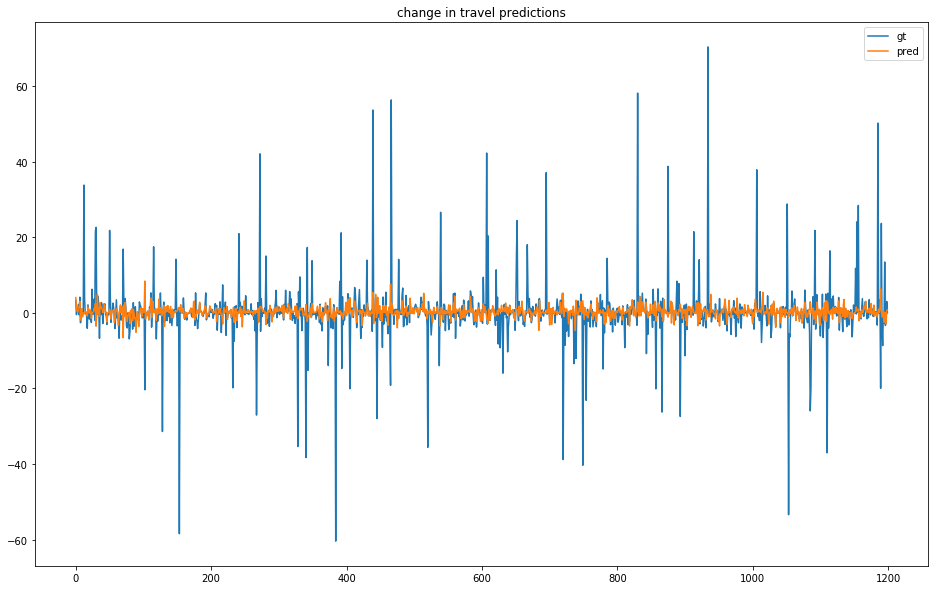

In [121]:
plt.figure(figsize=(16,10))
plt.title('change in travel predictions')
plt.plot(list(range(len(t_change_a))),t_change_a)
plt.plot(list(range(len(t_change_pred))),t_change_pred)

plt.legend(['gt','pred'])
plt.show()

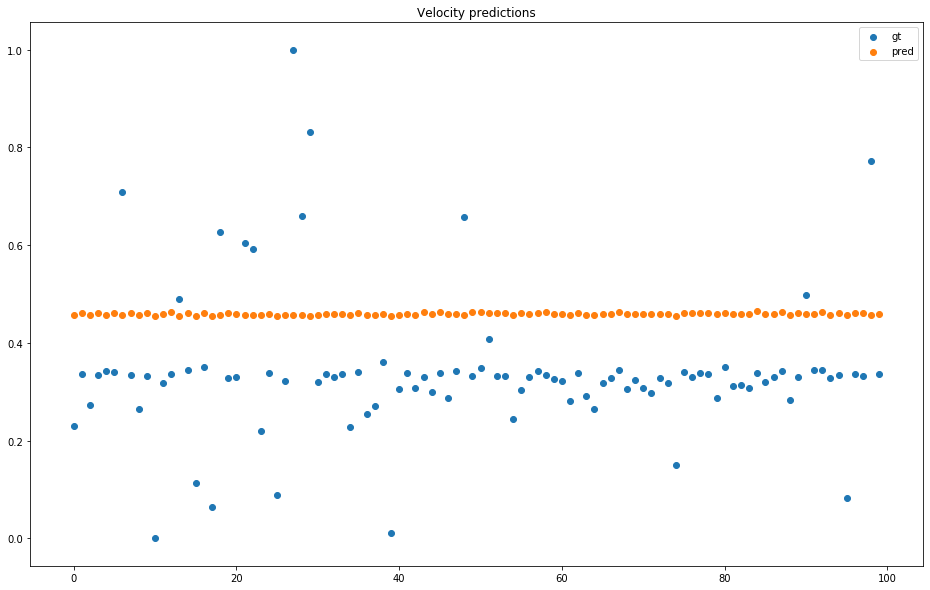

In [221]:

plt.figure(figsize=(16,10))
plt.title('Velocity predictions')
plt.scatter(list(range(len(v_a))),v_a)
plt.scatter(list(range(len(v_pred))),v_pred)
plt.legend(['gt','pred'])
plt.show()

In [123]:
'''TEST PREDICTIONS'''

test_predictions = sc.inverse_transform(model.predict(xtest))
test_predictions

array([[ 26.145317  ,  53.29123   ,   3.6082547 ],
       [ 22.525959  ,  46.46219   ,   3.105164  ],
       [ -3.1032736 ,  -1.8957324 ,  -0.4573722 ],
       ...,
       [-24.328812  , -41.94465   ,  -3.4077792 ],
       [ -3.3964632 ,  -2.448935  ,  -0.49812514],
       [ -1.316433  ,   1.4756991 ,  -0.20899992]], dtype=float32)

In [124]:
test_actual = sc.inverse_transform(ytest)
test_actual

array([[ 3.19831287e+01,  5.17181000e+01,  3.33000000e+00],
       [-4.57427728e+00,  4.95466000e+01, -4.60000000e-01],
       [ 1.11273389e+01, -3.12140000e+00,  1.14000000e+00],
       ...,
       [-1.71953217e+01, -3.00016000e+01, -1.79000000e+00],
       [ 2.80469389e+01, -2.11500000e+00,  3.03000000e+00],
       [ 0.00000000e+00,  2.80000000e-02,  0.00000000e+00]])

In [125]:
v_pred = []
travel_pred = []
t_change_pred = []
v_a = []
travel_a = []
t_change_a= []

for i in test_predictions:
    v_pred.append(i[0])
    travel_pred.append(i[1])
    t_change_pred.append(i[2])

for i in test_actual:
    v_a.append(i[0])
    travel_a.append(i[1])
    t_change_a.append(i[2])

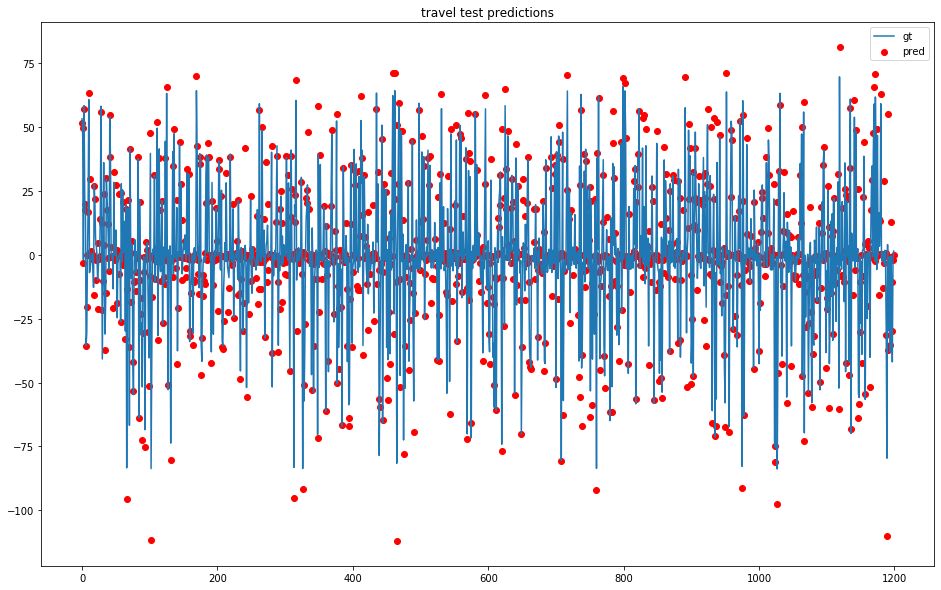

In [126]:
plt.figure(figsize=(16,10))
plt.title('travel test predictions')
plt.scatter(list(range(len(travel_a))),travel_a,color = 'r')
plt.plot(list(range(len(travel_pred))),travel_pred)

plt.legend(['gt','pred'])
plt.show()

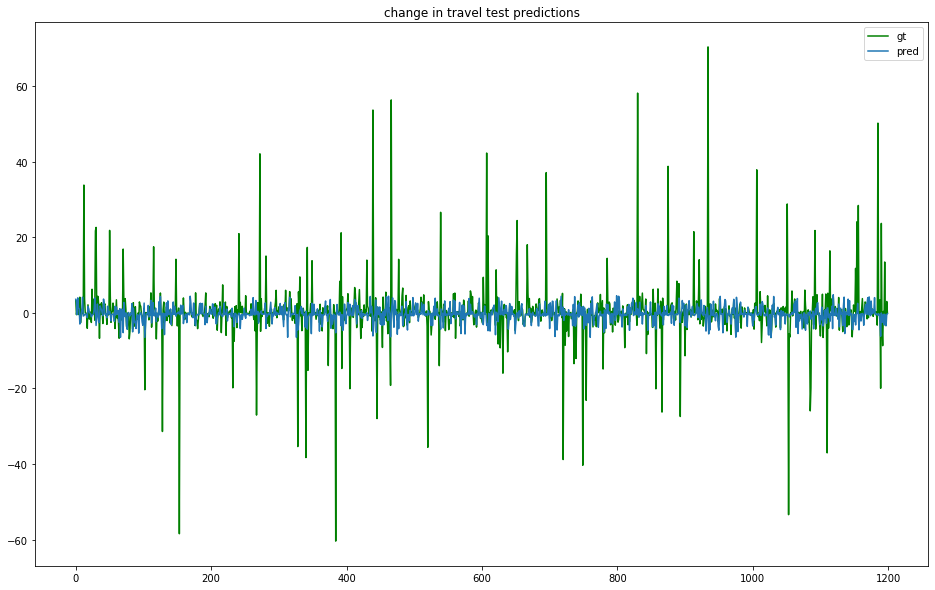

In [127]:
plt.figure(figsize=(16,10))
plt.title('change in travel test predictions')
plt.plot(list(range(len(t_change_a))),t_change_a,color = 'green')
plt.plot(list(range(len(t_change_pred))),t_change_pred)

plt.legend(['gt','pred'])
plt.show()

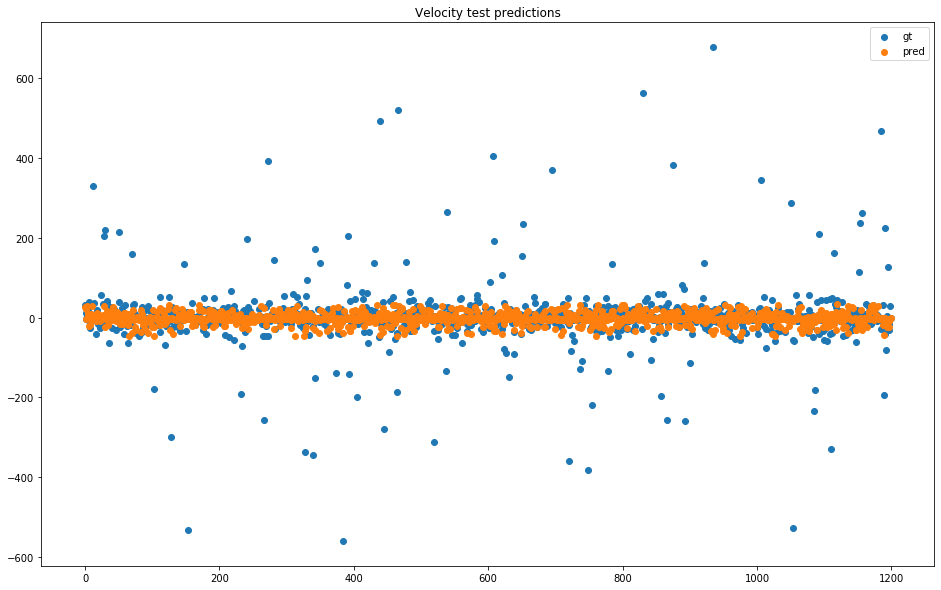

In [128]:

plt.figure(figsize=(16,10))
plt.title('Velocity test predictions')
plt.scatter(list(range(len(v_a))),v_a)
plt.scatter(list(range(len(v_pred))),v_pred)
plt.legend(['gt','pred'])
plt.show()

# Prediction Techniques
> Endeavour to run different kinds of predictions as a result of different time samples features
>
>Po to P40 because there are 40 datapoints were sampled per episode

In [188]:
#function returns all rows (datapoints) of a particular sampled timed-feature
#dataframe must not be shuffled as it emlpoys the use of the original indices
def getSampleTimedRows(dataframe,sample_timed_feature = 0,samples_per_episode = 40):
    #samples per episode referes to the number of samples
    #sampled per episode when callecting the data

    rows = []
    for i in range(sample_timed_feature,dataframe.shape[0],samples_per_episode):
        rows.append(dataframe.iloc[i])
    return pd.DataFrame(rows)
    
        
    

In [206]:
P1 = getSampleTimedRows(finaldf,sample_timed_feature=0)

In [214]:


Xp1 = P1.copy().drop(['v(t)','travel_dist','d(travel_dist)'],axis = 1)
Yp1 = P1[['v(t)','travel_dist','d(travel_dist)']]

Xp1_scaled = sc.fit_transform(Xp1)
Yp1_scaled = sc.fit_transform(Yp1)

In [215]:
Xp1_scaled.shape,Yp1_scaled.shape

((100, 242), (100, 3))

In [216]:
Xp1_pred = model.predict(Xp1_scaled)

In [219]:
v_pred = []
travel_pred = []
t_change_pred = []
v_a = []
travel_a = []
t_change_a= []

for i in Xp1_pred:
    v_pred.append(i[0])
    travel_pred.append(i[1])
    t_change_pred.append(i[2])

for i in Yp1_scaled:
    v_a.append(i[0])
    travel_a.append(i[1])
    t_change_a.append(i[2])

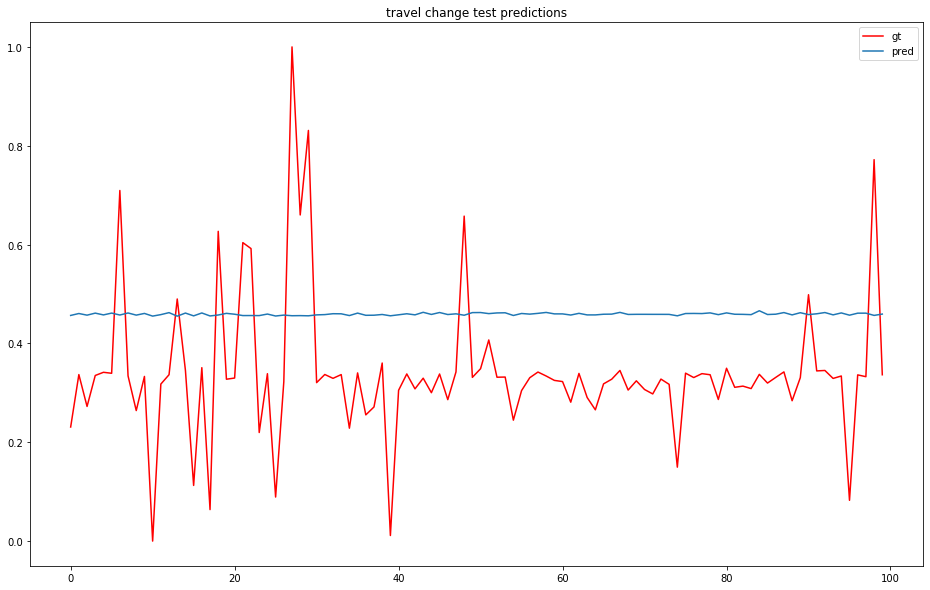

In [220]:
plt.figure(figsize=(16,10))
plt.title('travel change test predictions')
plt.plot(list(range(len(v_a))),v_a,color = 'r')
plt.plot(list(range(len(v_pred))),v_pred)

plt.legend(['gt','pred'])
plt.show()

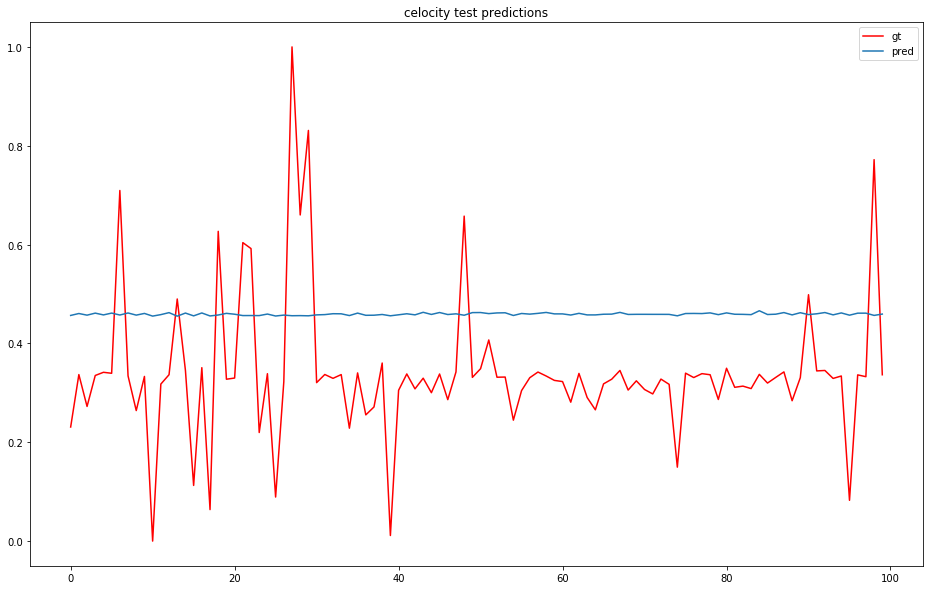

In [212]:
plt.figure(figsize=(16,10))
plt.title('celocity test predictions')
plt.plot(list(range(len(v_a))),v_a,color = 'r')
plt.plot(list(range(len(v_pred))),v_pred)

plt.legend(['gt','pred'])
plt.show()